In [11]:
# https://arxiv.org/abs/1409.4842
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3 
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/inception_v3.py 

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# 若下載失敗，請先刪除 c:\<使用者>\.keras\models\vgg16_weights_tf_dim_ordering_tf_kernels.h5
# command shift . to get .folders in finder
model = tf.keras.applications.InceptionV3(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    # classes=1000,
    classifier_activation='softmax'
)
model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 147, 147,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 147, 147,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 73, 73,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 73, 73,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 71, 71,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [15]:
# https://github.com/handsomeboy/vgg16 
# img_path = 'frog.jpg'
img_path = 'tiger.jpg' # 并转化为224*224的标准尺寸
# img_path = 'bagel.jpg'


# img_path = 'elephant.jpg'
# img = image.load_img(img_path, target_size=(299, 299))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)

# x = preprocess_input(x)
# 
# preds = model.predict(x)
# print('Predicted:', decode_predictions(preds))

img = tf.keras.preprocessing.image.load_img(img_path, target_size=(299, 299))

x = tf.keras.preprocessing.image.img_to_array(img) #转化为浮点型
x = np.expand_dims(x, axis=0)#转化为张量size为(1, 224, 224, 3)
# x = tf.keras.applications.vgg16.preprocess_input(x)
x = tf.keras.applications.inception_v3.preprocess_input(x)

# 預測，取得features，維度為 (1,1000)
features = model.predict(x)

# 取得前五個最可能的類別及機率
pred = tf.keras.applications.vgg16.decode_predictions(features, top=5)[0]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


[('n02129604', 'tiger', 0.8334701),
 ('n02123159', 'tiger_cat', 0.11194418),
 ('n04266014', 'space_shuttle', 0.00060523144),
 ('n02127052', 'lynx', 0.00054354564),
 ('n02128925', 'jaguar', 0.00037513074)]

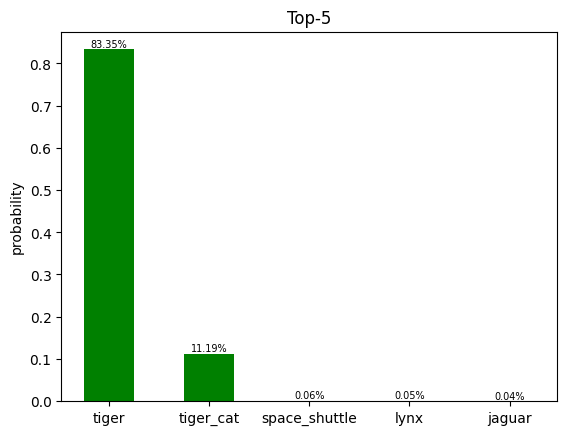

In [16]:
#整理预测结果,value
values = []
bar_label = []
for element in pred:
    values.append(element[2])
    bar_label.append(element[1])

#绘图并保存
def percent(value):
    return '%.2f%%' % (value * 100)

fig=plt.figure(u"Top-5 预测结果")
ax = fig.add_subplot(111)
ax.bar(range(len(values)), values, tick_label=bar_label, width=0.5, fc='g')
ax.set_ylabel(u'probability')
ax.set_title(u'Top-5')
for a,b in zip(range(len(values)), values):
    ax.text(a, b+0.0005, percent(b), ha='center', va = 'bottom', fontsize=7)

fig = plt.gcf()
plt.show()

name=img_path[0:-4]+'_pred'
fig.savefig(name, dpi=200)